<a href="https://colab.research.google.com/github/williamnpking/musicComputing2025/blob/main/assignments/labAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [7]:
def plotAudio2(sig,sampleRate,title):

   time=np.arange(0,sig.shape[0])/sampleRate

   excursion=max(abs(sig))
   sigNew = sig / excursion

   xlabel = 'Time (seconds)'
   ylabel = 'Amplitude'

   plt.plot(time,sigNew)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.title(title)
   plt.show()


In [22]:
def plotAudioFreqDomain(sig, sr, title, winSize, specType):

    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(sig)),ref=np.max), sr=sr, x_axis='time', y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [9]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

    # generate list of harmonics
    harmonics = np.arange(1,numHarmonics+1,seqHarm)
    print(harmonics)

    # create a time series from 0 to 1 the inputted length
    timeSeries = np.linspace(0, 1, samplingRate)

    # create a cosine wave for the fundamental
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent

    # scale the signal to between -1 and 1
    excursion=max(abs(signal))
    signal = signal / excursion

    # plot signal
    plt.plot(timeSeries,signal)
    plt.xlabel('Time (Sec)')
    plt.ylabel('Amplitude')
    plt.title('Additive Synthesis')
    plt.plot

    return signal

In [10]:
def makeWaveforms(frequency,samplingRate,numHarmonics,waveType):
    # use an if/elif/else statement to set up the parameters for
    # the different type of waveforms based on the code in
    # additiveSynthesis.ipynb
    # if, elif (else if) and else can be used to evaluate the contents of a variable
  if waveType == 'sawtooth':
    seqHarm = 1
    ampExponent = 1
  elif waveType == 'square':
    seqHarm = 2
    ampExponent = 1
  elif waveType == 'triangle':
    seqHarm = 2
    ampExponent = 2
  else:
    numHarmonics = 1
    seqHarm = 1
    ampExponent = 1

    # call additiveSynthesis() to generate a waveform
  signal = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)
    # return the generated waveform (signal)
  return signal


In [23]:
def visualizeWaveforms(frequency, samplingRate, numHarmonics, waveType):
  # call makeWaveform()
  # test whether makeWaveforms() runs without error before you try plotting anything
  signal = makeWaveforms(frequency, samplingRate, numHarmonics, waveType)
  # call plotAudio2()
  plotAudio2(signal, samplingRate, waveType)
  # call plotAudioFreqDomain()
  plotAudioFreqDomain(signal, samplingRate, waveType, 1024, 'log')
  # return the output of makeWaveform()
  return signal

[1]


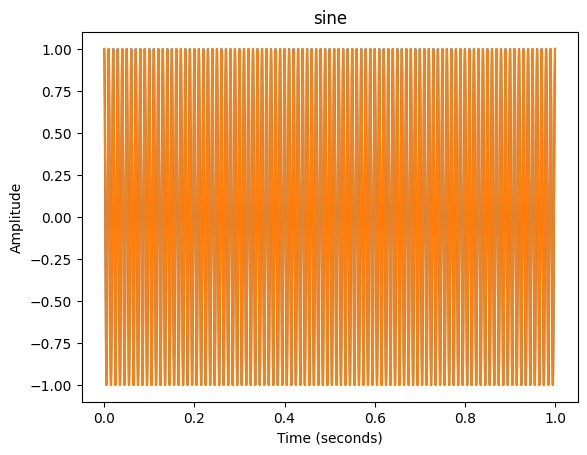

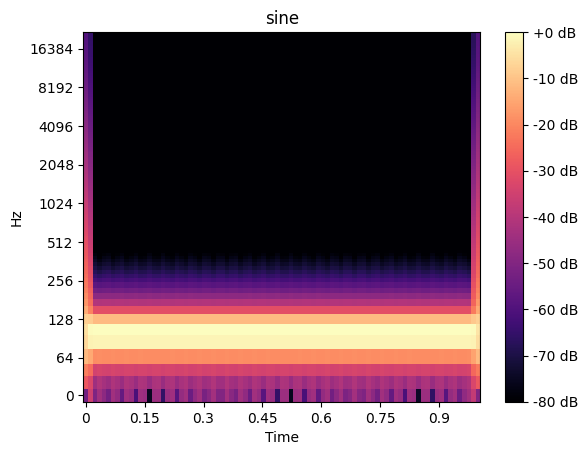

In [24]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal = visualizeWaveforms(100,44100,100,'sine')
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


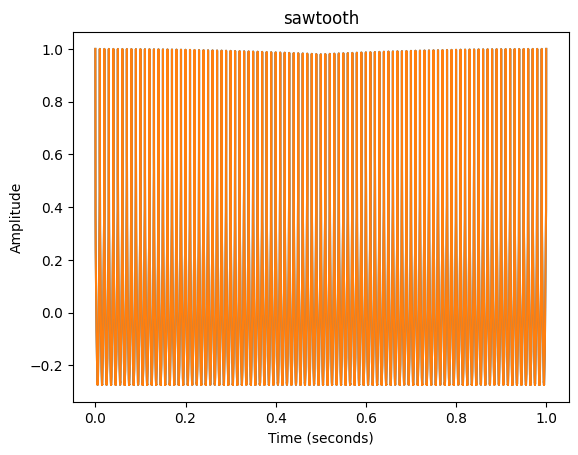

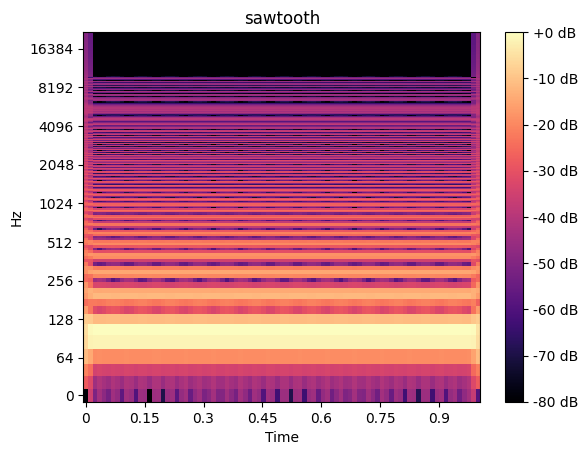

In [27]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal = visualizeWaveforms(100,44100,100,'sawtooth')
#IPython.display.Audio()

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


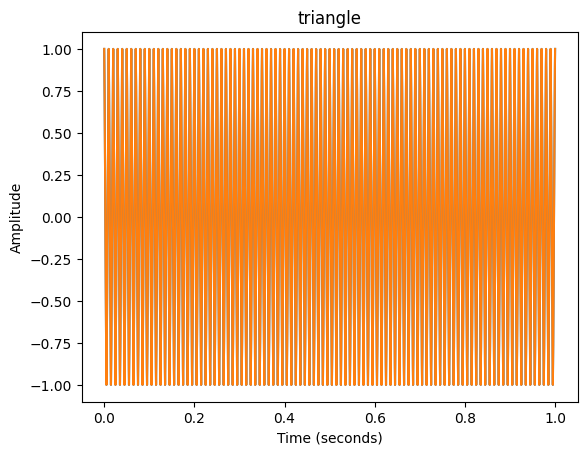

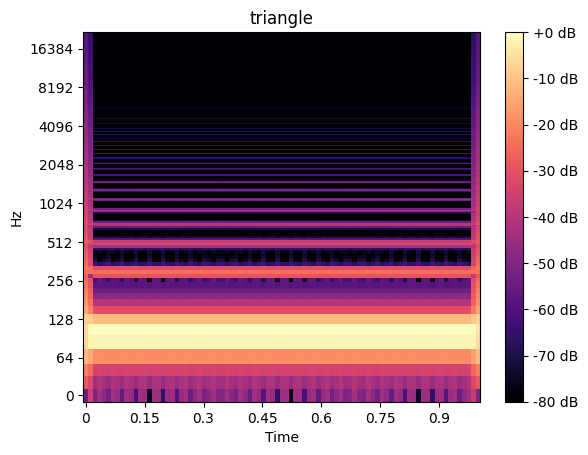

In [26]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'triangle'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal = visualizeWaveforms(100,44100,100,'triangle')
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


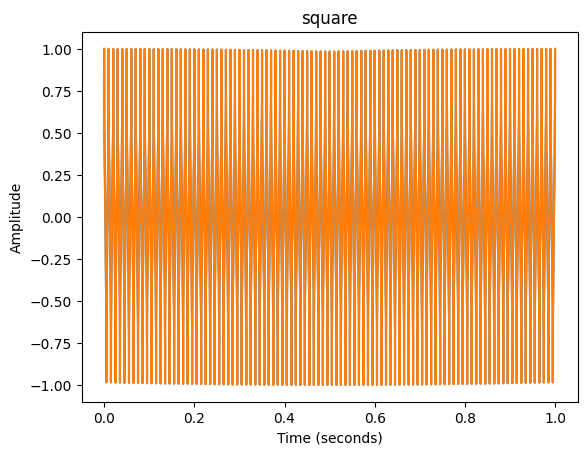

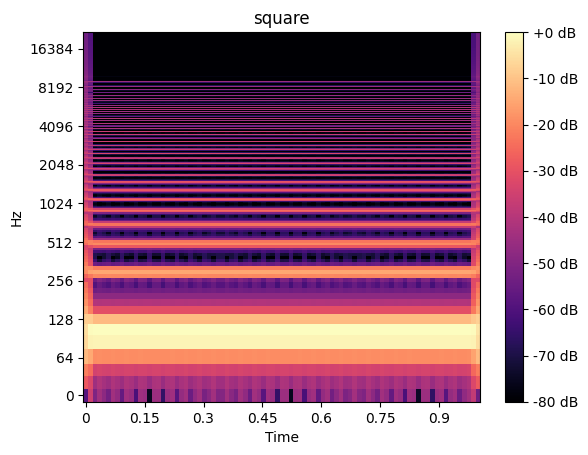

In [28]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'square'
winSize = 1024
specType = 'log'

#visualizeWaveforms()
signal = visualizeWaveforms(100,44100,100,'square')
#IPython.display.Audio()
IPython.display.Audio(data=signal, rate=samplingRate)